In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv('training_data.csv')

In [3]:
train_data.head()

,A,B,C,D,E,F,G,H,I,J,K,L,S,T,U,V,W,X,Y,Z,AA,AB,AC,AD,AE,AF,AG,AH,AI,AK,AL,AM,AN,AO,AP,AQ,AR,AS,AT,AU,...,BD,BE,BF,BG,BH,BI,BJ,BK,BL,BM,BN,BO,BP,BQ,BR,BS,BT,BU,BV,BW,BX,BY,BZ,CA,CB,CC,CD,CE,CF,CG,CH,CI,CJ,CK,CL,CM,CN,CO,CP,CQ
0,0,1,0,0,0,0,1,0,0,0,0,2,0,24,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,3,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,1,0,0,0,0,0,0,0,0,420,0.0,7,35,0,200,1
1,0,1,0,0,0,0,1,0,0,0,0,2,0,24,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,3,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,0,0,0,1,0,0,0,0,0,40,0.0,11,5,0,20,1
2,0,1,0,0,0,0,1,0,0,0,0,2,0,24,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,3,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,1,0,0,0,0,0,0,0,0,40,0.0,12,5,0,305,1
3,0,1,0,0,0,0,1,0,0,0,0,2,0,24,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,3,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,1,0,0,0,0,0,0,0,0,420,0.0,17,35,0,110,1
4,0,1,0,0,0,0,1,0,0,0,0,2,0,24,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,3,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,0,0,0,0,0,1,0,0,0,85,0.0,19,20,0,75,5


In [4]:
import numpy as np

In [5]:
xy = np.array(train_data)

In [6]:
print(xy)

[[  0.   1.   0. ...   0. 200.   1.]
 [  0.   1.   0. ...   0.  20.   1.]
 [  0.   1.   0. ...   0. 305.   1.]
 ...
 [  1.   0.   0. ...   0.  13.   4.]
 [  1.   0.   0. ...   0.   0.   4.]
 [  0.   0.   1. ...   0.   0.   2.]]


In [7]:
np.random.shuffle(xy)

In [8]:
y = xy[:, -1:]
x = xy[:, 0:-1]
print(y)
print(x)

[[4.]
 [3.]
 [5.]
 ...
 [5.]
 [2.]
 [3.]]
[[  0.   0.   1. ...  30.   0. 120.]
 [  0.   0.   0. ...   4.   0.   1.]
 [  0.   0.   1. ...  14.   0.   0.]
 ...
 [  1.   0.   0. ...  15.   0.   5.]
 [  0.   0.   1. ...  15.   0. 135.]
 [  1.   0.   0. ...  25.   0. 156.]]


In [9]:
x=x/x.max(axis=0)

In [10]:
k = 3500
l = 100
x_train = x[0:k,:]
y_train = y[0:k,:]
x_val = x[k:k+l,:]
y_val = y[k:k+l,:]
x_test = x[k+l:,:]
y_test = y[k+l:,:]

In [11]:
print(x_train.shape)
# print(x_train)
print()
print(y_train.shape)
# print(y_train)
print()
print(x_val.shape)
# print(x_val)
print()
print(y_val.shape)
# print(y_val)
print()
print(x_test.shape)
# print(x_test)
print()
print(y_test.shape)
# print(y_test)

(3500, 87)

(3500, 1)

(100, 87)

(100, 1)

(68, 87)

(68, 1)


In [32]:
def baseline_model():

  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(87, input_dim=input_shape, activation='sigmoid'))
  model.add(tf.keras.layers.Dropout(0.1))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dense(124, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.1))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dense(7,activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

Epoch 1/200
 94/110 [========================>.....] - ETA: 0s - loss: 2.0875 - accuracy: 0.2547
Epoch 00001: saving model to training_1/cp.ckpt
110/110 [==============================] - 0s 4ms/step - loss: 2.0424 - accuracy: 0.2666 - val_loss: 1.5866 - val_accuracy: 0.3700
Epoch 2/200
 97/110 [=========================>....] - ETA: 0s - loss: 1.6284 - accuracy: 0.3847
Epoch 00002: saving model to training_1/cp.ckpt
110/110 [==============================] - 0s 3ms/step - loss: 1.6004 - accuracy: 0.3943 - val_loss: 1.3894 - val_accuracy: 0.5200
Epoch 3/200
 94/110 [========================>.....] - ETA: 0s - loss: 1.4893 - accuracy: 0.4079
Epoch 00003: saving model to training_1/cp.ckpt
110/110 [==============================] - 0s 3ms/step - loss: 1.4853 - accuracy: 0.4080 - val_loss: 1.2475 - val_accuracy: 0.5100
Epoch 4/200
 93/110 [========================>.....] - ETA: 0s - loss: 1.3613 - accuracy: 0.4647
Epoch 00004: saving model to training_1/cp.ckpt
110/110 [==================

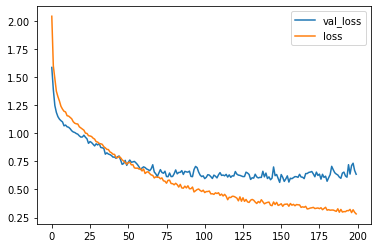

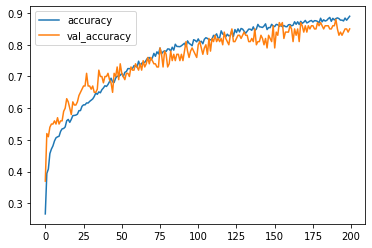

87


In [33]:
import tensorflow as tf
from matplotlib import pyplot as plt
import os

input_shape = x_train.shape[1]

model = baseline_model()

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

hist = model.fit(x_train, y_train, epochs=200,  validation_data=(x_val, y_val), callbacks=[cp_callback])
plt.plot(hist.history['val_loss'])
plt.show
plt.plot(hist.history['loss'])
plt.legend(["val_loss", "loss"], loc ="best") 
plt.show()

plt.plot(hist.history['accuracy'])
plt.show
plt.plot(hist.history['val_accuracy'])
plt.legend(["accuracy", "val_accuracy"], loc ="best") 
plt.show()
print(input_shape)

In [34]:
predicted = model.evaluate(x_test,y_test) 

3/3 [==============================] - 0s 2ms/step - loss: 0.8116 - accuracy: 0.8088


In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 87)                7656      
_________________________________________________________________
dropout_2 (Dropout)          (None, 87)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 87)                348       
_________________________________________________________________
dense_4 (Dense)              (None, 124)               10912     
_________________________________________________________________
dropout_3 (Dropout)          (None, 124)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 124)               496       
_________________________________________________________________
dense_5 (Dense)              (None, 7)                

In [37]:
export_path = os.path.abspath(os.getcwd())+'/models/saved_model'
model.save(export_path, save_format='tf')
export_path

INFO:tensorflow:Assets written to: /content/models/saved_model/assets


'/content/models/saved_model'

In [38]:
test_data = pd.read_csv('testing_data.csv')
ab = np.array(train_data)
b = ab[:, -1:]
a = ab[:, 0:-1]
a = a/a.max(axis=0)
print(a.shape)
print(a)
print()
print(b.shape)
print(b)

(3668, 87)
[[0.         1.         0.         ... 0.04481434 0.         0.19512195]
 [0.         1.         0.         ... 0.00640205 0.         0.0195122 ]
 [0.         1.         0.         ... 0.00640205 0.         0.29756098]
 ...
 [1.         0.         0.         ... 0.00256082 0.         0.01268293]
 [1.         0.         0.         ... 0.00256082 0.         0.        ]
 [0.         0.         1.         ... 1.         0.         0.        ]]

(3668, 1)
[[1.]
 [1.]
 [1.]
 ...
 [4.]
 [4.]
 [2.]]


In [39]:
import_path = os.path.abspath(os.getcwd())+'/models/saved_model'
reloaded_model = tf.keras.models.load_model(import_path)
reloaded_model.summary()
reloaded_model.load_weights(checkpoint_path)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 87)                7656      
_________________________________________________________________
dropout_2 (Dropout)          (None, 87)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 87)                348       
_________________________________________________________________
dense_4 (Dense)              (None, 124)               10912     
_________________________________________________________________
dropout_3 (Dropout)          (None, 124)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 124)               496       
_________________________________________________________________
dense_5 (Dense)              (None, 7)                

In [40]:
non_trainable_layers = len(reloaded_model.layers)-1
for i in range(1,non_trainable_layers):
  reloaded_model.layers[i].trainable = False
reloaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 87)                7656      
_________________________________________________________________
dropout_2 (Dropout)          (None, 87)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 87)                348       
_________________________________________________________________
dense_4 (Dense)              (None, 124)               10912     
_________________________________________________________________
dropout_3 (Dropout)          (None, 124)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 124)               496       
_________________________________________________________________
dense_5 (Dense)              (None, 7)                

In [41]:
reloaded_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
reloaded_model.fit(a, b, epochs=100, verbose=1)

Epoch 1/100
115/115 [==============================] - 0s 2ms/step - loss: 0.2352 - accuracy: 0.9212
Epoch 2/100
115/115 [==============================] - 0s 2ms/step - loss: 0.2484 - accuracy: 0.9076
Epoch 3/100
115/115 [==============================] - 0s 2ms/step - loss: 0.2382 - accuracy: 0.9130
Epoch 4/100
115/115 [==============================] - 0s 2ms/step - loss: 0.2281 - accuracy: 0.9193
Epoch 5/100
115/115 [==============================] - 0s 2ms/step - loss: 0.2202 - accuracy: 0.9174
Epoch 6/100
115/115 [==============================] - 0s 2ms/step - loss: 0.2257 - accuracy: 0.9155
Epoch 7/100
115/115 [==============================] - 0s 2ms/step - loss: 0.2103 - accuracy: 0.9220
Epoch 8/100
115/115 [==============================] - 0s 2ms/step - loss: 0.2157 - accuracy: 0.9185
Epoch 9/100
115/115 [==============================] - 0s 2ms/step - loss: 0.1984 - accuracy: 0.9261
Epoch 10/100
115/115 [==============================] - 0s 2ms/step - loss: 0.2181 - accura

In [42]:
prediction_model_eval = model.evaluate(a, b) 
reloaded_model_eval = reloaded_model.evaluate(a, b)

115/115 [==============================] - 0s 1ms/step - loss: 0.0752 - accuracy: 0.9716
